In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df_top = pd.read_excel('data.xlsx')

В файле «data.xlsx» представлены данные по поступлению денежных средств от
клиентов компании N за покупку ее услуг.
Имеющиеся поля:

• client_id - ID клиента;

• sum – сумма денежных средств;

• status – статус оплаты;

• sale – менеджер, заключивший сделку;

• new/current – статус сделки;

• document – наличие оригинала подписанного договора с клиентом;

• receiving_date – дата получения оригинала договора.

In [3]:
df_top

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
...,...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,NaN,оригинал,2021-11-15 00:00:00
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,NaN,НЕТ,NaN
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,NaN,НЕТ,NaN
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,NaN,оригинал,2021-11-08 00:00:00


In [4]:
df_top = df_top.drop('Unnamed: 5', axis=1)

In [5]:
df_top

,client_id,sum,status,sale,new/current,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00
...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15 00:00:00
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,НЕТ,NaN
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,НЕТ,NaN
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,оригинал,2021-11-08 00:00:00


In [6]:
df_top.dtypes

client_id         float64
sum               float64
status             object
sale               object
new/current        object
document           object
receiving_date     object
dtype: object

# 1.Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных средств которых не просрочен.

In [7]:
def fix_date(vec):
    ret=[]
    for x in vec:
        if isinstance(x, datetime):
            ret.append(x)
        else:
            ret.append(np.nan)
    return ret

df_top.receiving_date=fix_date(df_top.receiving_date)
df_top['Day'] = df_top['receiving_date'].dt.day
df_top['Month'] = df_top['receiving_date'].dt.month
df_top['Year'] = df_top['receiving_date'].dt.year
df_top

,client_id,sum,status,sale,new/current,document,receiving_date,Day,Month,Year
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaT,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,NaT,NaN,NaN,NaN
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26,26.0,7.0,2021.0
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,8.0,6.0,2021.0
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,8.0,6.0,2021.0
...,...,...,...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15,15.0,11.0,2021.0
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,НЕТ,NaT,NaN,NaN,NaN
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,НЕТ,NaT,NaN,NaN,NaN
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,оригинал,2021-11-08,8.0,11.0,2021.0


In [8]:
filtered_df = df_top[(df_top['status'] == 'ОПЛАЧЕНО') & (df_top['Month'] == 7) & (df_top['Year'] == 2021)]
total_revenue = filtered_df['sum'].sum()
print("Выручка за июль 2021 года:", total_revenue)

Выручка за июль 2021 года: 757830.7399999996


# 2.Как изменялась выручка компании за рассматриваемый период? Проиллюстрируйте графиком.


In [9]:
monthly_revenue = df_top.groupby(['Month'])['sum'].sum()
monthly_revenue

Month
5.0      43925.30
6.0     499499.57
7.0     766734.44
8.0     862503.76
9.0     870410.97
10.0    857668.33
11.0    375606.30
Name: sum, dtype: float64

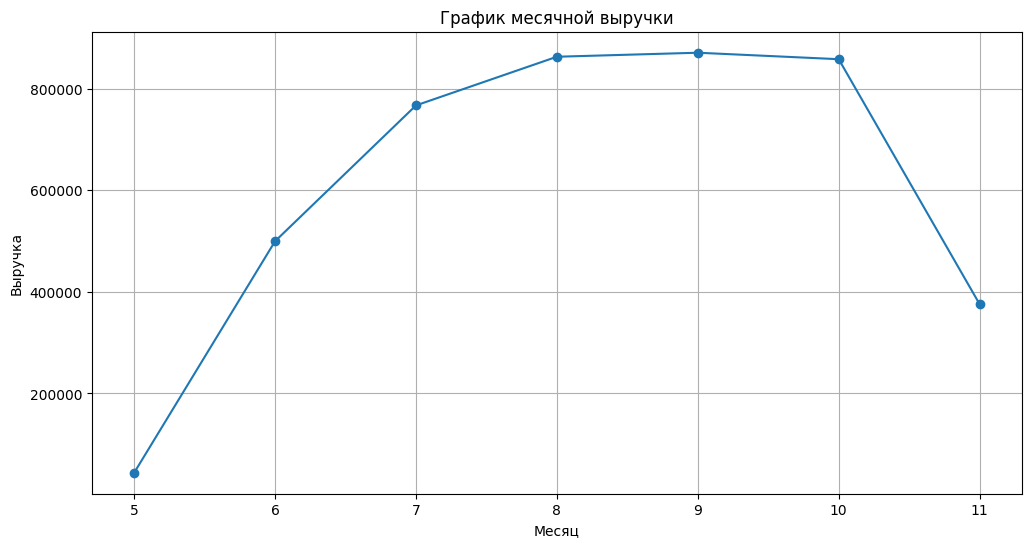

In [10]:
plt.figure(figsize=(12, 6))

plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linestyle='-')

plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.title('График месячной выручки')

plt.grid(True)
plt.show()

# 3 Кто из менеджеров привлек для компании больше всего денежных средств в сентябре 2021?

In [11]:
df_top['sale']

0             NaN
1               -
2         Петрова
3          Иванов
4          Иванов
          ...    
725      Васильев
726      Васильев
727      Васильев
728      Михайлов
729    Филимонова
Name: sale, Length: 730, dtype: object

In [12]:
september_data = df_top[df_top['Month'] == 9]
manager_sales = september_data.groupby('sale')['sum'].sum().reset_index()
top_manager = manager_sales[manager_sales['sum'] == manager_sales['sum'].max()]
top_manager

,sale,sum
4,Петрова,219240.12


Менеджер Петрова привлекла больше всего денежных средств в сентябре 2021

# 4 Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?

In [13]:
october_data = df_top[df_top['Month'] == 10]
document_status = october_data.groupby('new/current').count().reset_index()
document_status[['new/current', 'document']]

,new/current,document
0,новая,16
1,текущая,101


В октябре 2021 преобладали сделки с типом текущая

# 5 Сколько оригиналов договора по майским сделкам было получено в июне 2021?

Нужно чтобы договор был получен в июне 2021 и был оформлен в мае 2021. Необходимо найти номер строки когда начинается июнь в таблице. И для меньшей таблицы с мая по июнь посчитать количество июньских оригиналов.

In [14]:
index_1 = df_top.loc[df_top['status'] == 'Июнь 2021'].index[0]
index_1

129

In [15]:
index_2 = df_top.loc[df_top['status'] == 'Май 2021'].index[0]
index_2

0

In [16]:
df_top.iloc[index_1]

client_id               NaN
sum                     NaN
status            Июнь 2021
sale                    NaN
new/current             NaN
document                NaN
receiving_date          NaT
Day                     NaN
Month                   NaN
Year                    NaN
Name: 129, dtype: object

In [17]:
df_top.iloc[index_2]

client_id              NaN
sum                    NaN
status            Май 2021
sale                   NaN
new/current            NaN
document               NaN
receiving_date         NaT
Day                    NaN
Month                  NaN
Year                   NaN
Name: 0, dtype: object

In [18]:
filtered_df = df_top.iloc[index_2+1:index_1]
count_original_in_june = len(filtered_df[(filtered_df['Month'] == 6.0) & (filtered_df['document'] == 'оригинал')])

print("Количество оригиналов договора по майским сделкам в июне 2021:", count_original_in_june)
filtered_df

Количество оригиналов договора по майским сделкам в июне 2021: 76


,client_id,sum,status,sale,new/current,document,receiving_date,Day,Month,Year
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,NaT,NaN,NaN,NaN
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26,26.0,7.0,2021.0
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,8.0,6.0,2021.0
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,8.0,6.0,2021.0
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07,7.0,7.0,2021.0
...,...,...,...,...,...,...,...,...,...,...
124,277.0,4623.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-14,14.0,7.0,2021.0
125,281.0,4488.7,ОПЛАЧЕНО,Селиванов,новая,оригинал,2021-07-16,16.0,7.0,2021.0
126,284.0,8903.7,ПРОСРОЧЕНО,Филимонова,текущая,оригинал,2021-07-27,27.0,7.0,2021.0
127,286.0,3453.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-05-31,31.0,5.0,2021.0


# Задание:
За каждую заключенную сделку менеджер получает бонус, который рассчитывается
следующим образом.
1) За новые сделки менеджер получает 7 % от суммы, при условии, что статус
оплаты «ОПЛАЧЕНО», а также имеется оригинал подписанного договора с
клиентом (в рассматриваемом месяце).
2) За текущие сделки менеджер получает 5 % от суммы, если она больше 10 тыс.,
и 3 % от суммы, если меньше. При этом статус оплаты может быть любым,
кроме «ПРОСРОЧЕНО», а также необходимо наличие оригинала подписанного
договора с клиентом (в рассматриваемом месяце).

Бонусы по сделкам, оригиналы для которых приходят позже рассматриваемого
месяца, считаются остатком на следующий период, который выплачивается по мере
прихода оригиналов. Вычислите остаток каждого из менеджеров на 01.07.2021.

In [19]:
def bonus(row):
    if ((row['new/current']=='новая') and(row.status == 'ОПЛАЧЕНО') and row.receiving_date):
        return round(row['sum'] * 0.07,2)
    
    if(row['new/current']=='текущая'):
        if(row.status != 'ПРОСРОЧЕНО'):
            if(row['sum'] < 10000):
                return round(row['sum']*0.03,2)
            else:
                return round(row['sum']*0.05,2)
    return 0

In [20]:
df_top['bonus'] = df_top.apply(bonus,axis=1)
df_top[df_top.receiving_date > '2021-07-01'].groupby('sale').agg({'bonus' : 'sum'})

,bonus
sale,
Андреев,27164.33
Васильев,6934.62
Иванов,22041.63
Кузнецова,16108.75
Михайлов,607.07
Петрова,28282.41
Селиванов,7102.47
Смирнов,31089.65
Соколов,3730.70
